## Import the required libraries and read the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats.mstats import normaltest

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [3]:
df=pd.read_csv('laptops.csv')

In [4]:
df

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,core i7,10,16,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,ryzen 5,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,amd,integrated,False,14.0,2560,1600,windows,1


## Creating a new column called 'storage type' which contains ssd, hdd, hybrid

In [5]:
df.loc[df['secondary_storage_capacity'] != 0, 'primary_storage_type'] = 'hybrid'

In [6]:
df['primary_storage_type'].value_counts()

primary_storage_type
SSD       964
hybrid     15
HDD        12
Name: count, dtype: int64

In [7]:
df.drop(columns=['secondary_storage_type'], inplace=True)

In [8]:
df.rename(columns={'primary_storage_type': 'storage_type'}, inplace=True)


## Data information

In [9]:
df.shape

(991, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  storage_type                991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_capacity  991 non-null    int64  
 13  gpu_brand                   991 non

In [11]:
df = df.drop('index', axis = 1)

In [12]:
df.dtypes

brand                          object
Model                          object
Price                           int64
Rating                          int64
processor_brand                object
processor_tier                 object
num_cores                       int64
num_threads                     int64
ram_memory                      int64
storage_type                   object
primary_storage_capacity        int64
secondary_storage_capacity      int64
gpu_brand                      object
gpu_type                       object
is_touch_screen                  bool
display_size                  float64
resolution_width                int64
resolution_height               int64
OS                             object
year_of_warranty               object
dtype: object

Number of rows - 991

Number of columns - 20

Number of categorical features - 9

Number of numerical features - 11

## Exploratory Data Analysis

In [13]:
# For numerical features
numerical = df.select_dtypes(include= ['float64', 'int64'])
# For categorical features
categorical = df.select_dtypes(include=['object'])

Univariate analysis on categorical columns

In [14]:
categorical.columns

Index(['brand', 'Model', 'processor_brand', 'processor_tier', 'storage_type',
       'gpu_brand', 'gpu_type', 'OS', 'year_of_warranty'],
      dtype='object')

Brand

conclusions:

 more than 50% laptops in this data belongs to lenovo, hp, asus

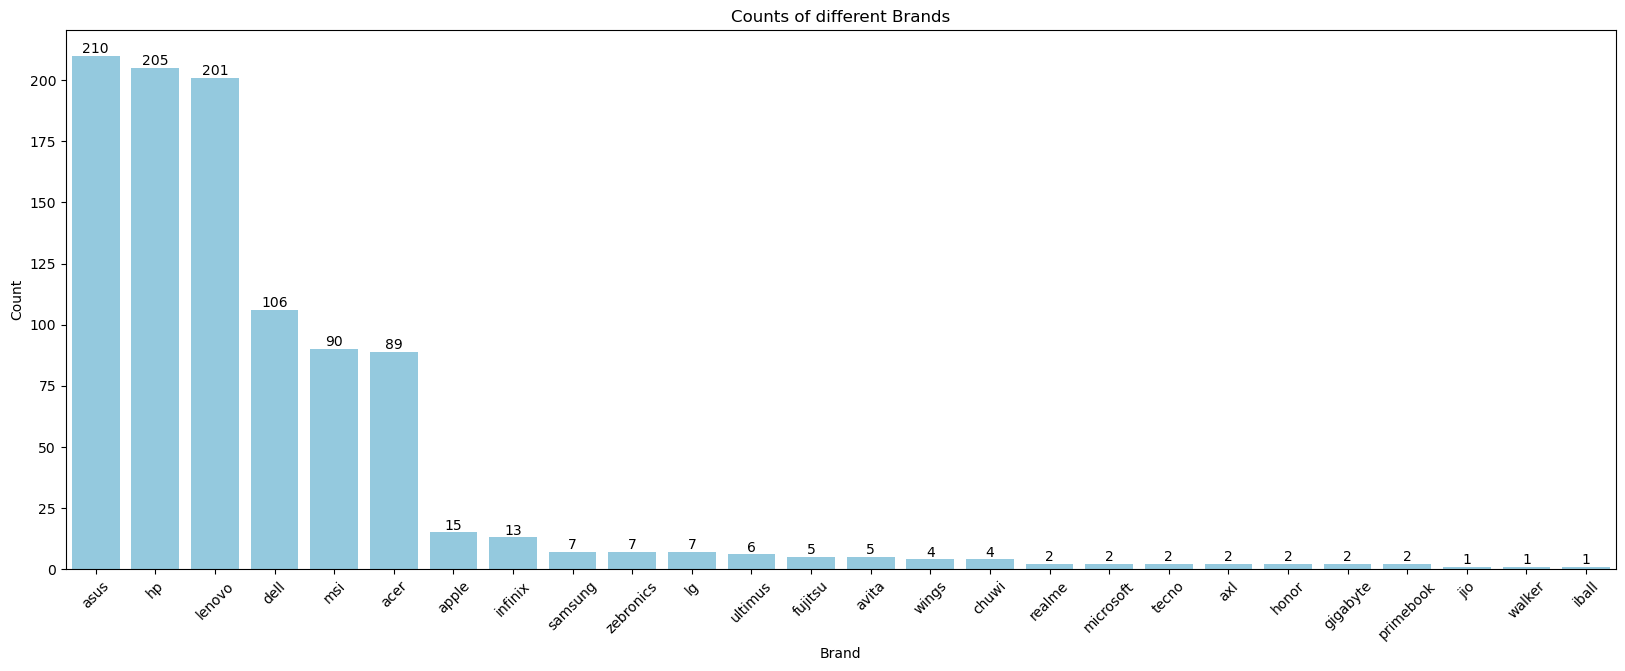

In [15]:
plt.figure(figsize=(20,7))
brand_counts = categorical.brand.value_counts()
ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, color='skyblue')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Counts of different Brands')
plt.xticks(rotation=45)
plt.show()

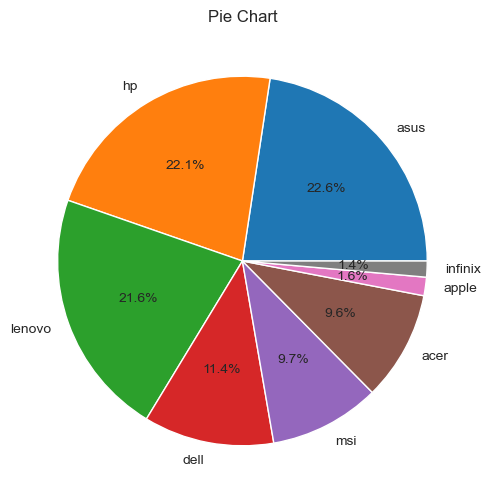

In [16]:
brand_counts = categorical.brand.value_counts().head(8)
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(brand_counts,labels=brand_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()


Processor Brand

conclusions:

approx 70% laptops have intel processor

In [17]:
categorical.processor_brand.value_counts()

processor_brand
intel    705
amd      267
apple     15
other      4
Name: count, dtype: int64

## categorical.processor_brand.value_counts()

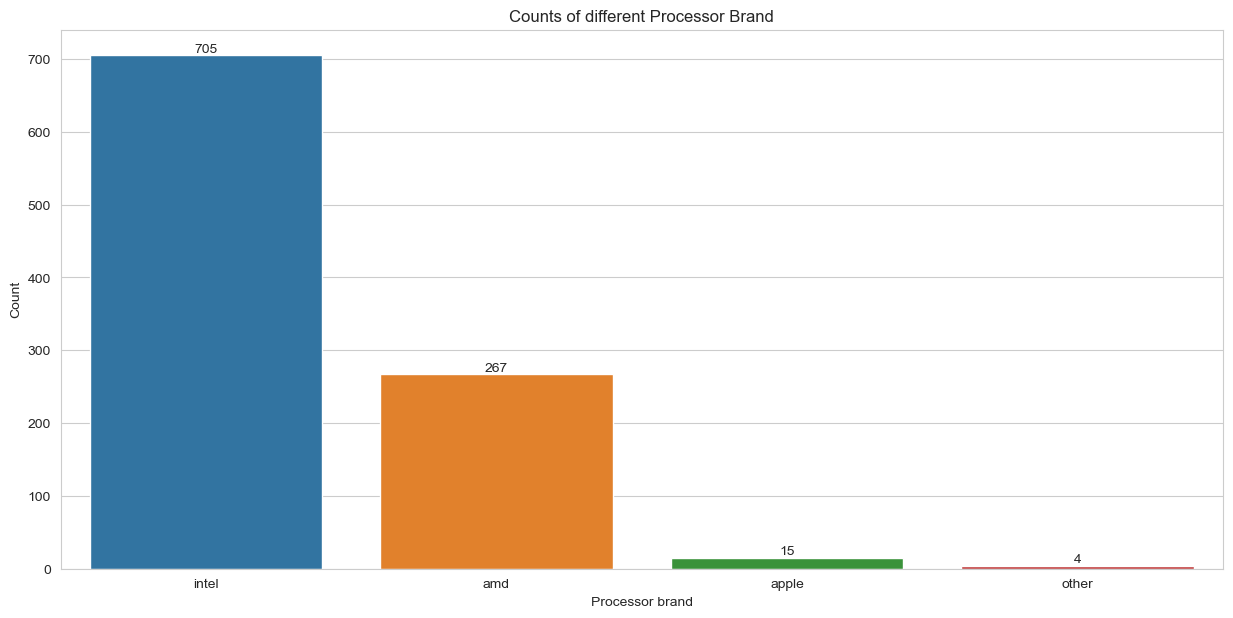

In [18]:
plt.figure(figsize=(15,7))
processor_brand_counts = categorical.processor_brand.value_counts()
ax = sns.barplot(x=processor_brand_counts.index, y=processor_brand_counts.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Processor brand')
plt.ylabel('Count')
plt.title('Counts of different Processor Brand')
plt.show()

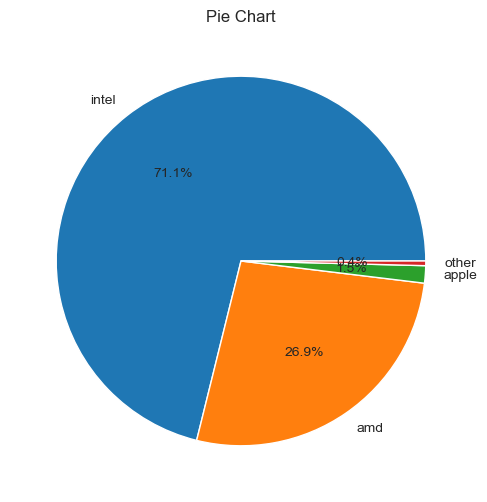

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(processor_brand_counts,labels=processor_brand_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

Processor Tier 

conclusions:

core i5 dominates the laptop market

In [20]:
categorical.processor_tier.value_counts()

processor_tier
core i5         335
core i7         159
ryzen 5         139
core i3         127
ryzen 7          77
celeron          40
core i9          37
ryzen 3          31
other            14
ryzen 9          12
m3                8
m2                6
core ultra 7      3
pentium           2
m1                1
Name: count, dtype: int64

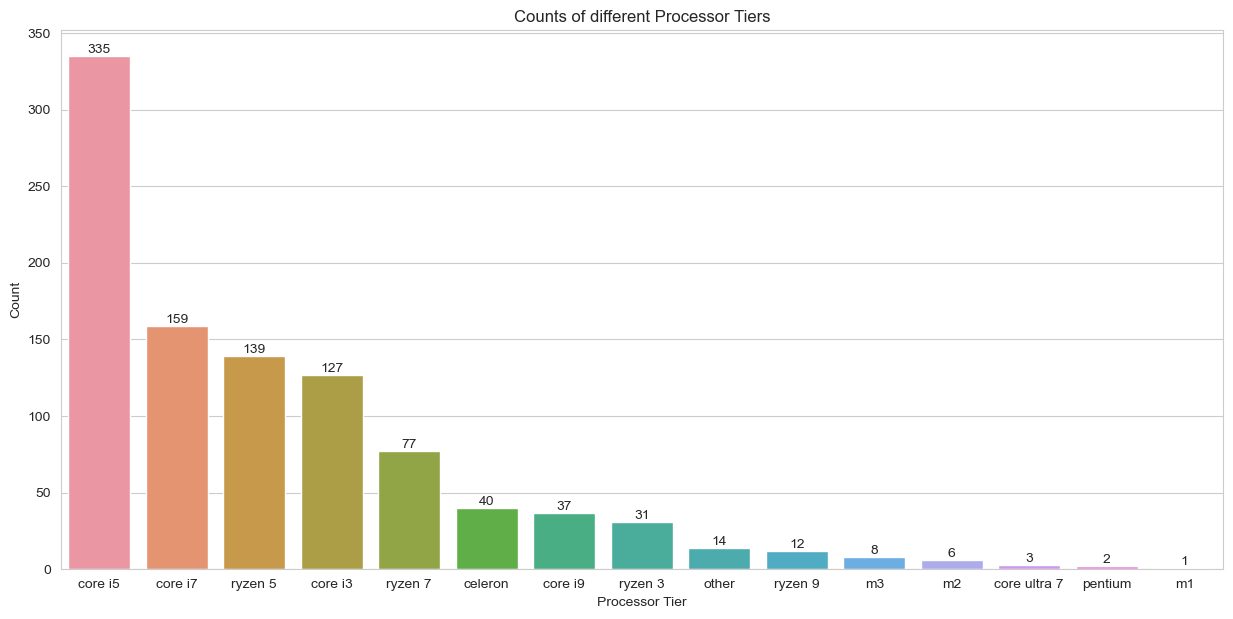

In [21]:
plt.figure(figsize=(15,7))
processor_tier_counts = categorical.processor_tier.value_counts()
ax = sns.barplot(x=processor_tier_counts.index, y=processor_tier_counts.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Processor Tier')
plt.ylabel('Count')
plt.title('Counts of different Processor Tiers')
plt.show()

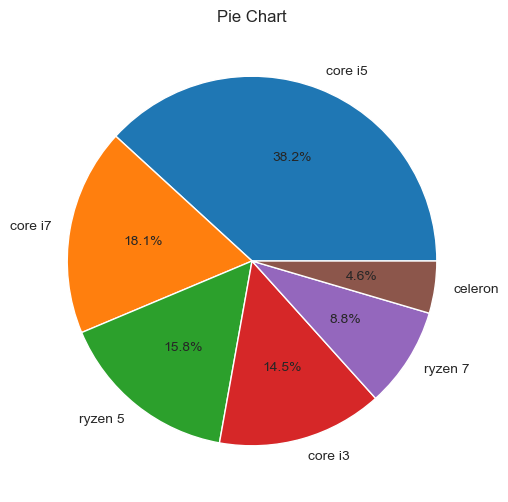

In [22]:
processor_tier_counts = categorical.processor_tier.value_counts().head(6)
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(processor_tier_counts,labels=processor_tier_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

storage_type 

conclusions:

more than 95% laptops have SSD as its storage type

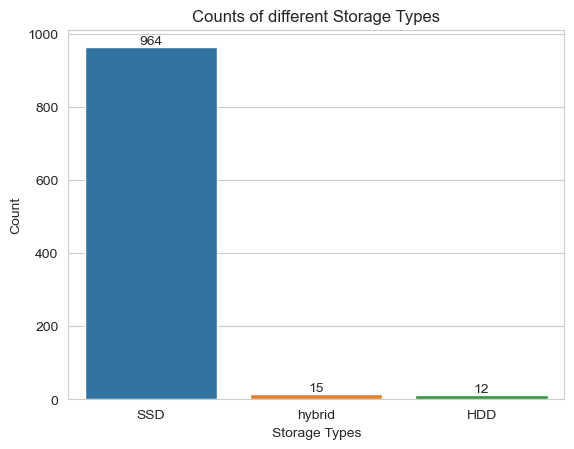

In [23]:
storage_type_counts = categorical.storage_type.value_counts()
ax = sns.barplot(x=storage_type_counts.index, y=storage_type_counts.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Storage Types')
plt.ylabel('Count')
plt.title('Counts of different Storage Types')
plt.show()


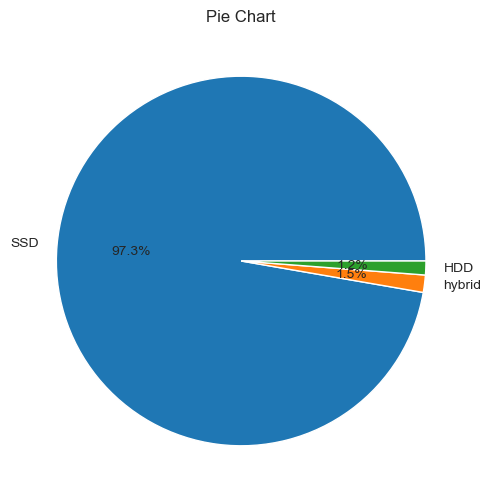

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(storage_type_counts,labels=storage_type_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

gpu_brand and gpu_type

conclusions:

• Approx 80% laptops have intel and nvidia processor

• Approx 62% laptops have integrated graphics most of them are from intel

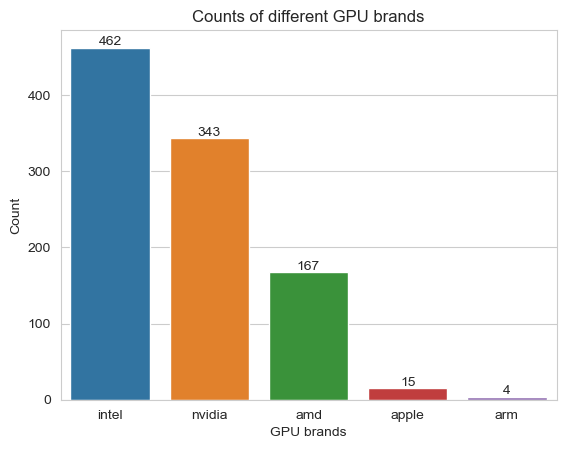

In [25]:
gpu_brand_counts = categorical.gpu_brand.value_counts()
ax = sns.barplot(x=gpu_brand_counts.index, y=gpu_brand_counts.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('GPU brands')
plt.ylabel('Count')
plt.title('Counts of different GPU brands')
plt.show()

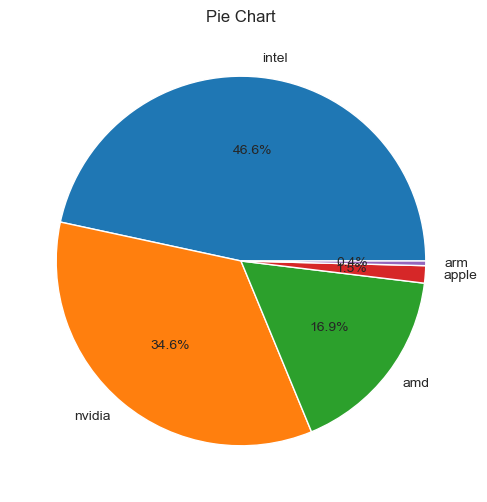

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(gpu_brand_counts,labels=gpu_brand_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

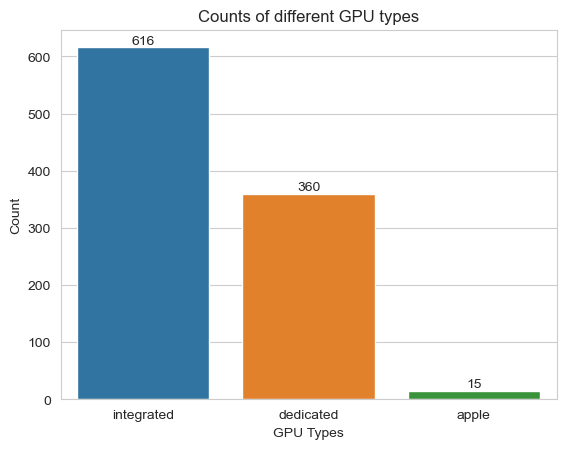

In [27]:
gpu_type_counts = categorical.gpu_type.value_counts()
ax = sns.barplot(x=gpu_type_counts.index, y=gpu_type_counts.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('GPU Types')
plt.ylabel('Count')
plt.title('Counts of different GPU types')
plt.show()

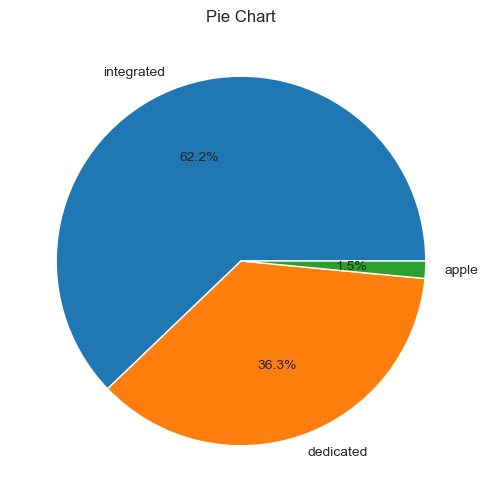

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(gpu_type_counts,labels=gpu_type_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

is_touch_screen

conclusions:

Most of the laptops are non-touch

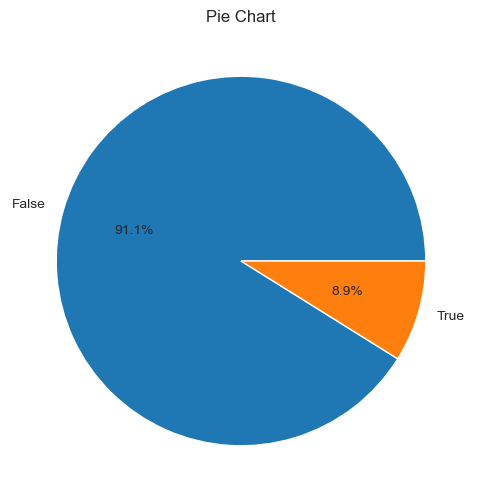

In [29]:
touch_screen_counts = df['is_touch_screen'].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(touch_screen_counts,labels=touch_screen_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

OS

conclusions:

Approx 93% laptops have windows os

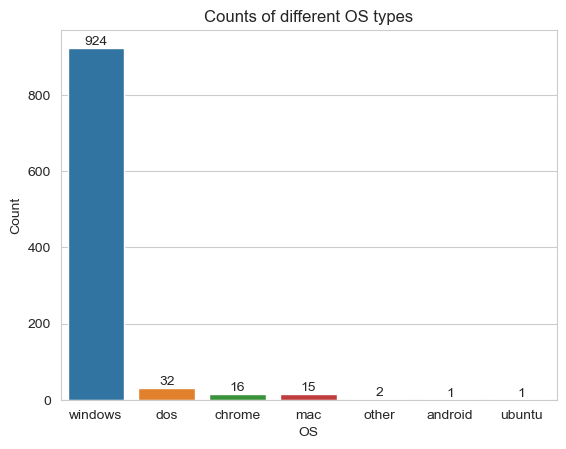

In [30]:
os_counts = categorical.OS.value_counts()
ax = sns.barplot(x=os_counts.index, y=os_counts.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('OS')
plt.ylabel('Count')
plt.title('Counts of different OS types')
plt.show()

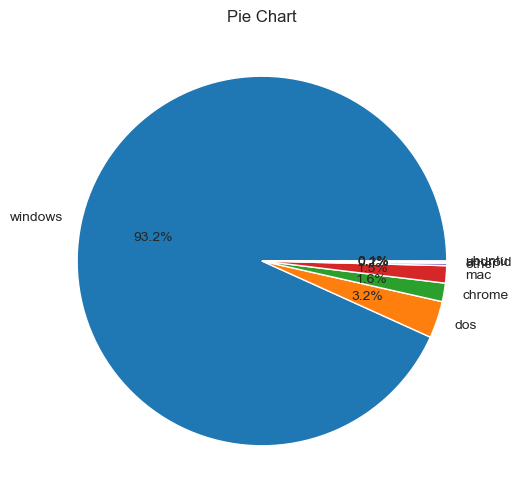

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(os_counts,labels=os_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

year_of_warranty 

conclusions:

Most of the laptops have 1 year as its warranty

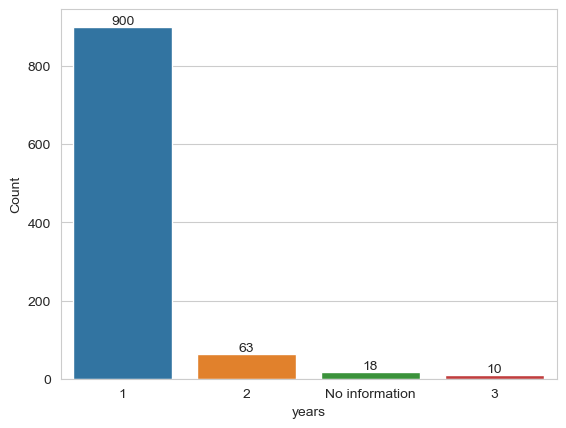

In [32]:
year_counts = categorical.year_of_warranty.value_counts()
ax = sns.barplot(x=year_counts.index, y=year_counts.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('years')
plt.ylabel('Count')
plt.show()

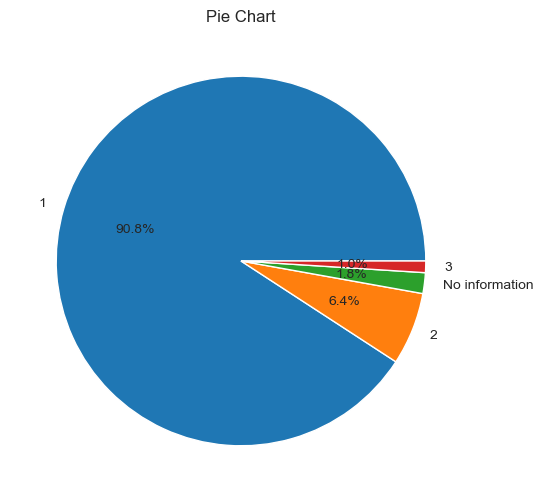

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(year_counts,labels=year_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

Univariate analysis on numerical columns

In [34]:
numerical.columns

Index(['Price', 'Rating', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_capacity', 'secondary_storage_capacity',
       'display_size', 'resolution_width', 'resolution_height'],
      dtype='object')

Price

conclusions:

• It's a log-normal distribution

• There are extreme outliers above the 90th percentile data

count       991.000000
mean      77266.504541
std       57384.910269
min        9800.000000
25%       43595.000000
50%       61900.000000
75%       89245.000000
max      454490.000000
Name: Price, dtype: float64


C:\Users\gauri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

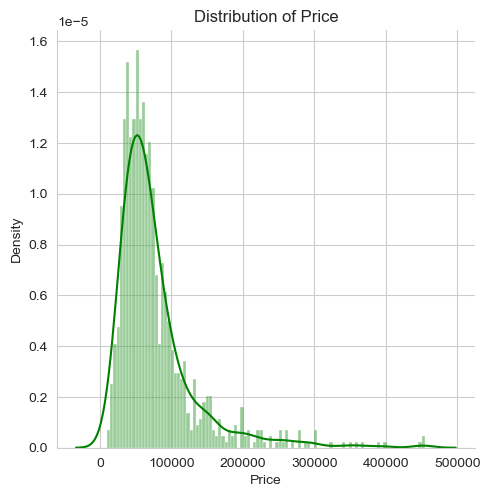

In [35]:
print(df['Price'].describe())
plt.figure(figsize=(8,6))
sns.displot(df['Price'], color='g', bins=100, alpha=0.4, kde=True, stat="density", kde_kws=dict(cut=3))
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

Taking the log of the price column will do the trick and it will give us the famous normal distribution

In [36]:
log_data = np.log(df['Price'])

C:\Users\gauri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

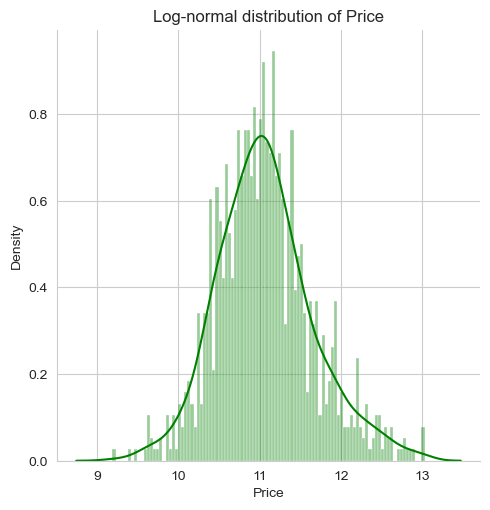

In [37]:
plt.figure(figsize=(8,6))
sns.displot(log_data, color='g', bins=100, alpha=0.4, kde=True, stat="density", kde_kws=dict(cut=3))
plt.title('Log-normal distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [38]:
log_data.describe()

count    991.000000
mean      11.066079
std        0.589109
min        9.190138
25%       10.682695
50%       11.033275
75%       11.399137
max       13.026931
Name: Price, dtype: float64

In [39]:
df['Price'].skew()

2.779862726618332

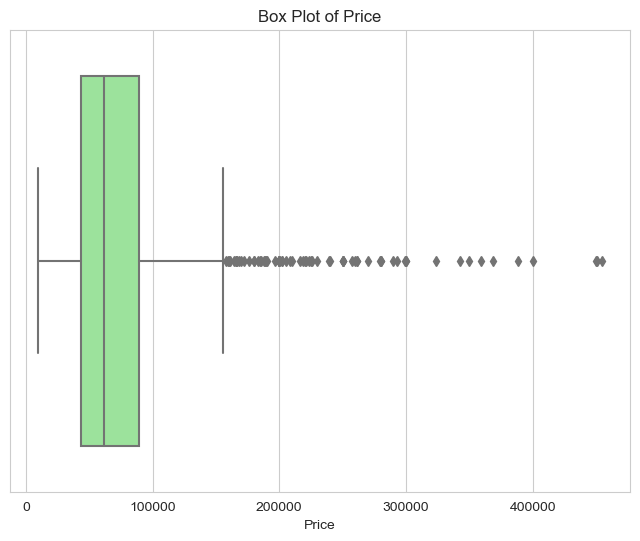

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Price', color='lightgreen')
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

In [41]:
df['Price'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

0.10     32490.0
0.20     39800.0
0.30     46990.0
0.40     53990.0
0.50     61900.0
0.60     69990.0
0.70     80020.0
0.80     97999.0
0.90    139990.0
0.95    189945.0
0.99    302390.0
Name: Price, dtype: float64

Rating 

conclusions:

• Its a somewhat normal distribution

• There are some outliers

C:\Users\gauri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


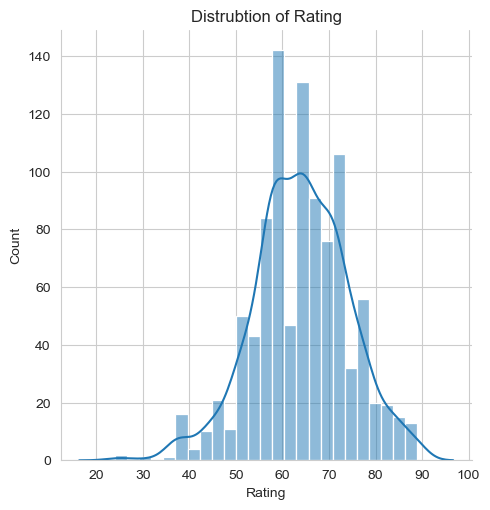

In [42]:
sns.displot(numerical.Rating, kde=True, kde_kws=dict(cut=3))
plt.title('Distrubtion of Rating')
plt.show()

In [43]:
df['Rating'].skew()

-0.199286270812219

In [44]:
df['Rating'].describe()

count    991.000000
mean      63.931382
std       10.190575
min       24.000000
25%       58.000000
50%       64.000000
75%       71.000000
max       89.000000
Name: Rating, dtype: float64

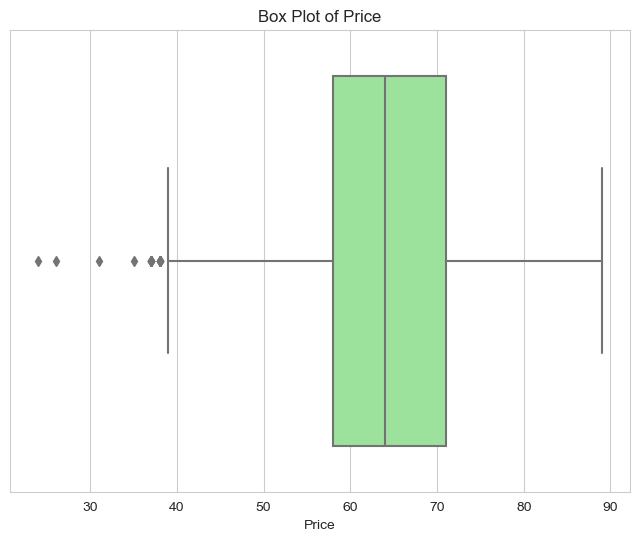

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Rating', color='lightgreen')
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

num_cores and num_threads

Text(0.5, 1.0, 'Counts of num_cores')

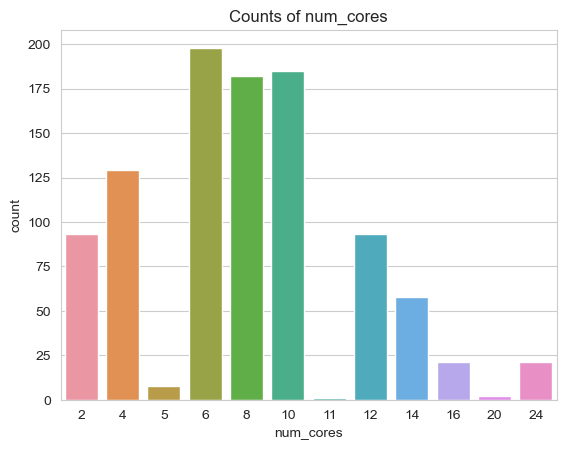

In [46]:
sns.countplot(x='num_cores',data=numerical)
plt.title('Counts of num_cores')

Text(0.5, 1.0, 'Counts of num_threads')

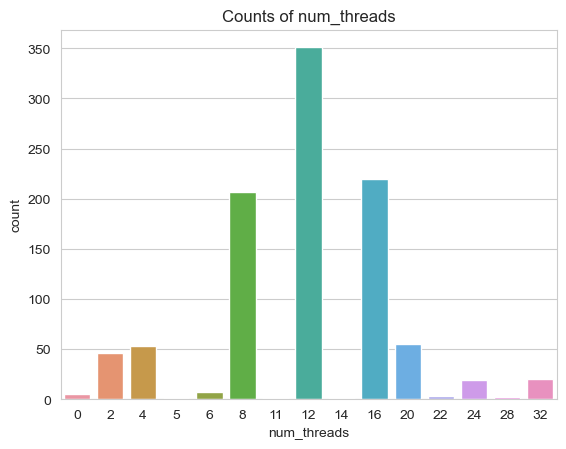

In [47]:
sns.countplot(x='num_threads',data=numerical)
plt.title('Counts of num_threads')

ram_memory , primary_storage_capacity, secondary_storage_capacity

conclusions:

• Most of the laptops have ram capacity either 8GB or 16GB

• Most of the laptops have memory capacity 512GB

Text(0.5, 1.0, 'Counts of ram_memory (in GB)')

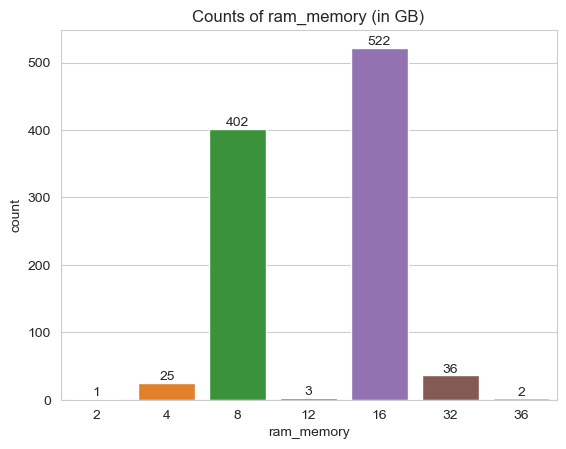

In [48]:
ax = sns.countplot(x='ram_memory',data=numerical)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Counts of ram_memory (in GB)')

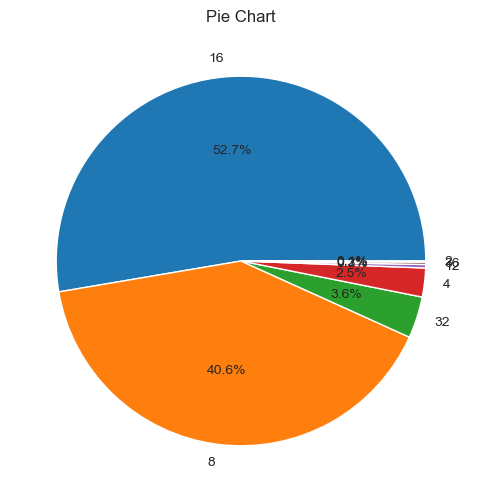

In [49]:
ram_counts = numerical.ram_memory.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(ram_counts,labels=ram_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

Text(0.5, 1.0, 'Counts of primary_memory (in GB)')

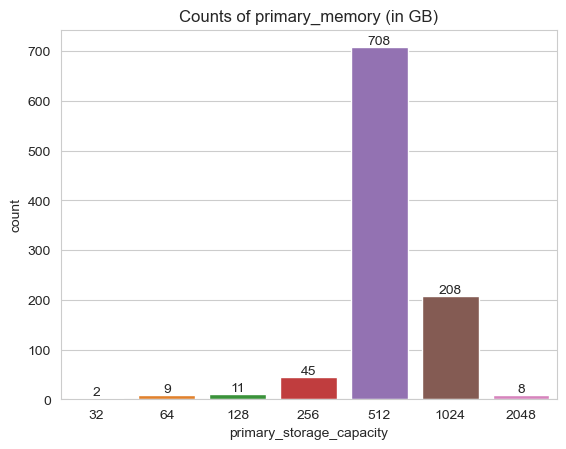

In [50]:
ax = sns.countplot(x='primary_storage_capacity',data=numerical)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Counts of primary_memory (in GB)')

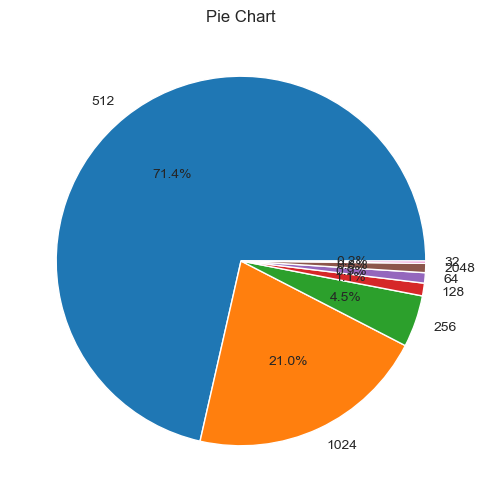

In [51]:
primary_counts = numerical.primary_storage_capacity.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(primary_counts,labels=primary_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()


Text(0.5, 1.0, 'Counts of secondary_memory (in GB)')

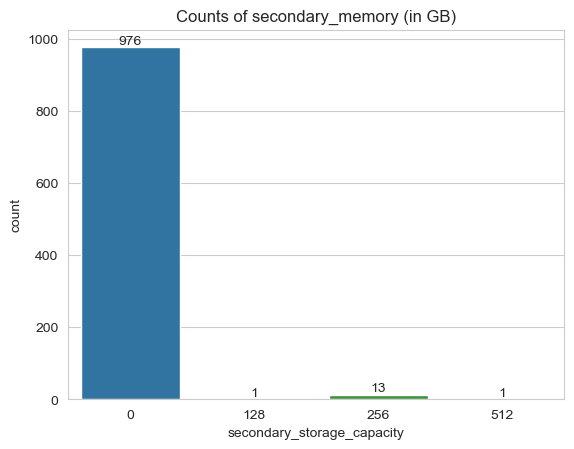

In [52]:
ax = sns.countplot(x='secondary_storage_capacity',data=numerical)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Counts of secondary_memory (in GB)')


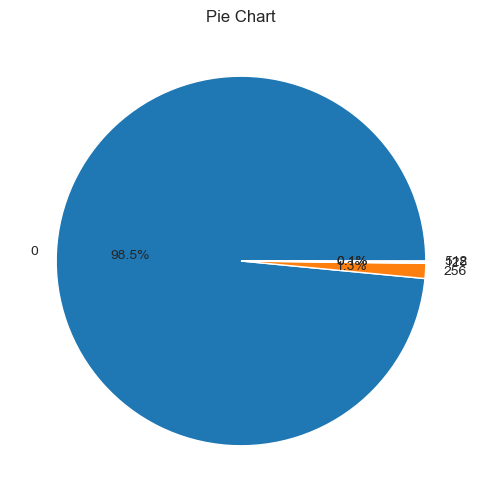

In [53]:
secondary_counts = numerical.secondary_storage_capacity.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(secondary_counts,labels=secondary_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

display_size

conclusions:

Most of the laptops have display size - 15.6 inch

<Axes: xlabel='display_size', ylabel='Count'>

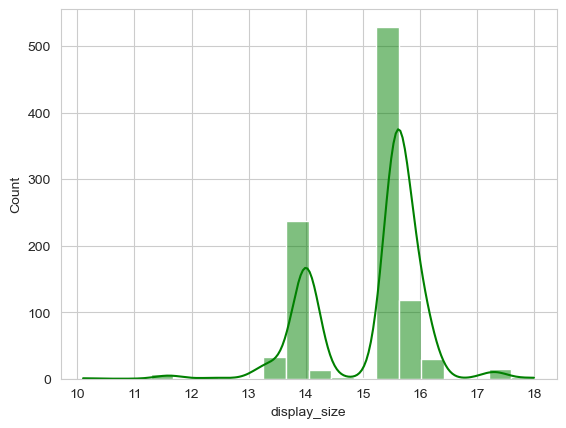

In [54]:
sns.histplot(data=numerical, x="display_size", bins=20, kde=True, color="green")

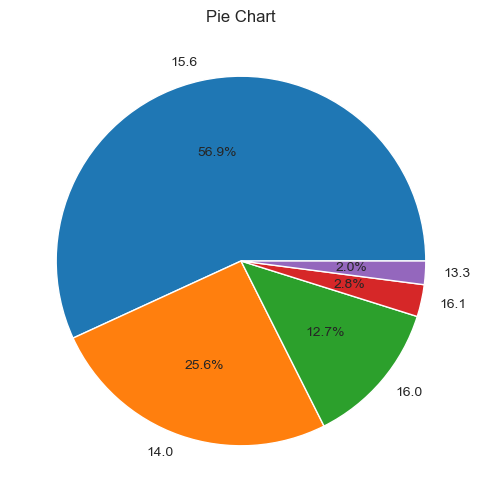

In [55]:
display_counts = numerical.display_size.value_counts().head()
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(display_counts,labels=display_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

resolution_width and resolution_height

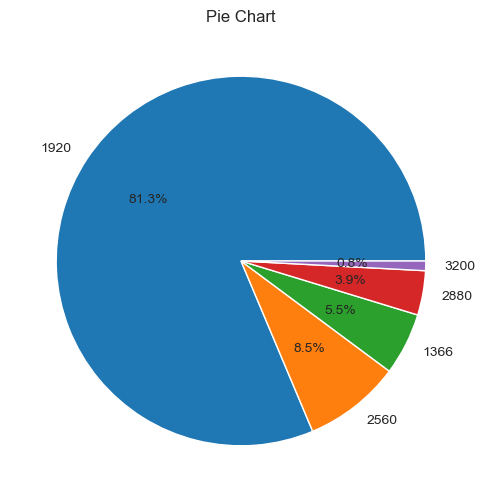

In [56]:
width_counts = numerical.resolution_width.value_counts().head()
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(width_counts,labels=width_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()


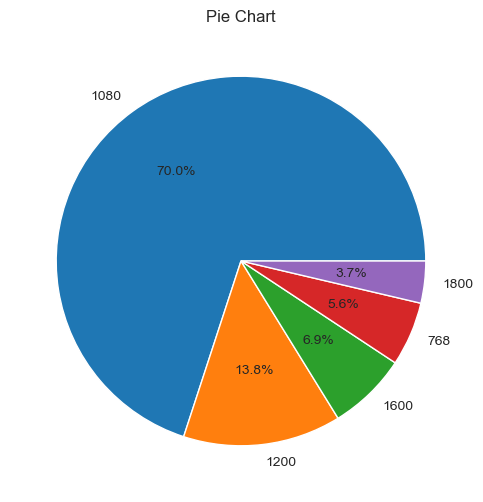

In [57]:
height_counts = numerical.resolution_height.value_counts().head()
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(height_counts,labels=height_counts.index,
       autopct = '%0.1f%%')
plt.title('Pie Chart')
plt.show()

In [58]:
print(df['resolution_width'].head(10),'\n\n',df['resolution_height'].head(10))

0    1920
1    1920
2    1920
3    1920
4    1920
5    2560
6    1920
7    1920
8    1920
9    1920
Name: resolution_width, dtype: int64 

 0    1080
1    1080
2    1080
3    1080
4    1080
5    1600
6    1080
7    1080
8    1080
9    1080
Name: resolution_height, dtype: int64


In [59]:
width = df['resolution_width']
height = df['resolution_height']
display = df['display_size']

# Calculate the ppi
ppi = (width**2 + height**2)**0.5

# Caluculate the dpi
dpi = ppi / display

df.insert(18, 'ppi', ppi)

In [60]:
df.insert(19, 'dpi', dpi)

In [61]:
df.columns

Index(['brand', 'Model', 'Price', 'Rating', 'processor_brand',
       'processor_tier', 'num_cores', 'num_threads', 'ram_memory',
       'storage_type', 'primary_storage_capacity',
       'secondary_storage_capacity', 'gpu_brand', 'gpu_type',
       'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'ppi', 'dpi', 'OS', 'year_of_warranty'],
      dtype='object')

In [62]:
df['ppi'] = df['ppi'].round(2)


In [63]:
df['dpi'] = df['dpi'].round(2)


ppi and dpi

<Axes: xlabel='ppi', ylabel='Count'>

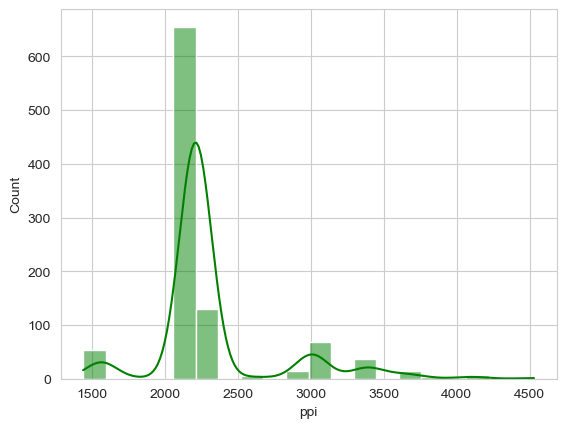

In [64]:
sns.histplot(data=df, x="ppi", bins=20, kde=True, color="green")

<Axes: xlabel='dpi', ylabel='Count'>

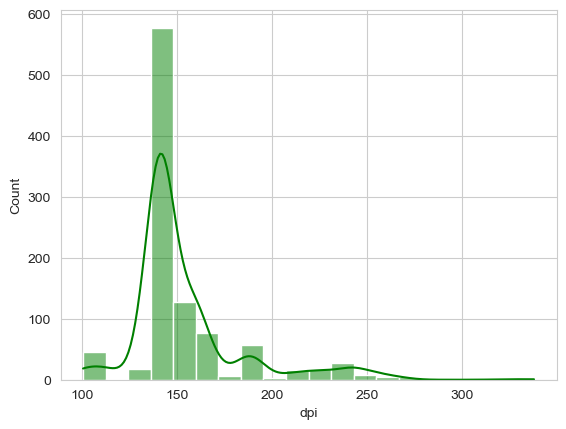

In [65]:
sns.histplot(data=df, x="dpi", bins=20, kde=True, color="green")

# Bivariate analysis of price with all columns

conclusions:

• Laptops having higher rating are expensive compared to low rated laptops

• Laptops having apple as its processor are expensive

• Laptops having processor core i9 or m3 chip are expensive

• Laptops having higher Ram capacity are more expensive

• Laptops having 2TB storage capacity are more expensive

• Laptops having apple and nvidia as its gpu brand are more expensive

• Laptops having apple and dedicated gpu type are more expensive

• Laptops having mac as its os are more expensive

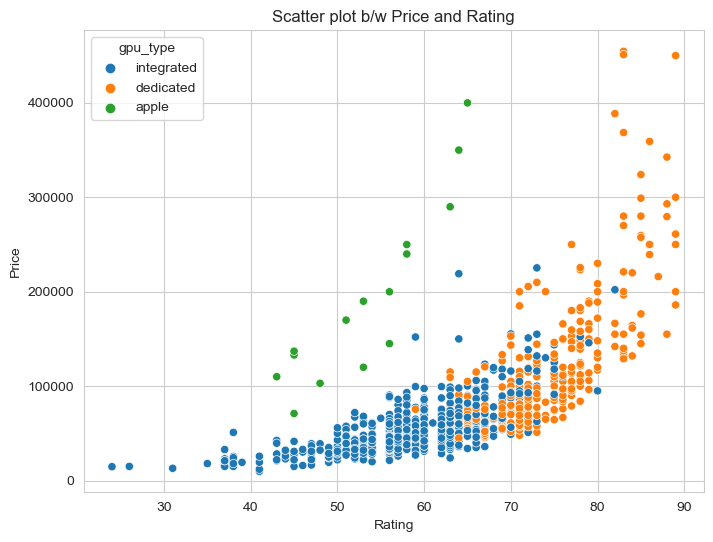

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(y="Price", x="Rating", data=df, hue='gpu_type')
plt.title('Scatter plot b/w Price and Rating')
plt.show()

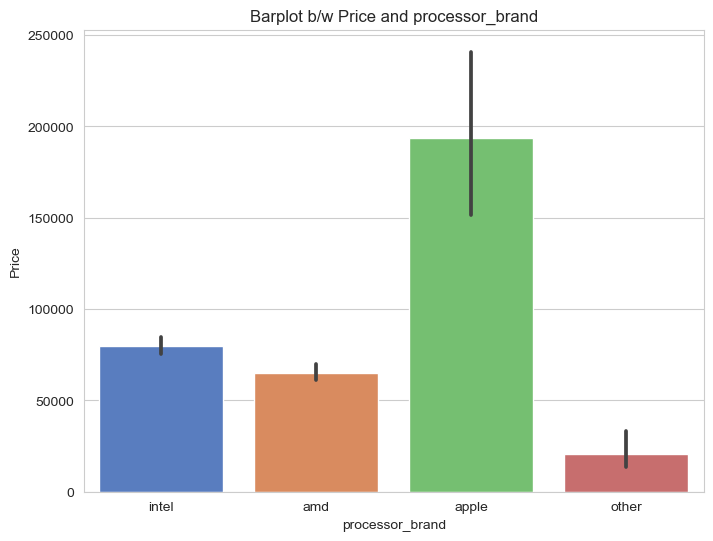

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='processor_brand', y='Price', palette="muted")
plt.title('Barplot b/w Price and processor_brand')
plt.show()


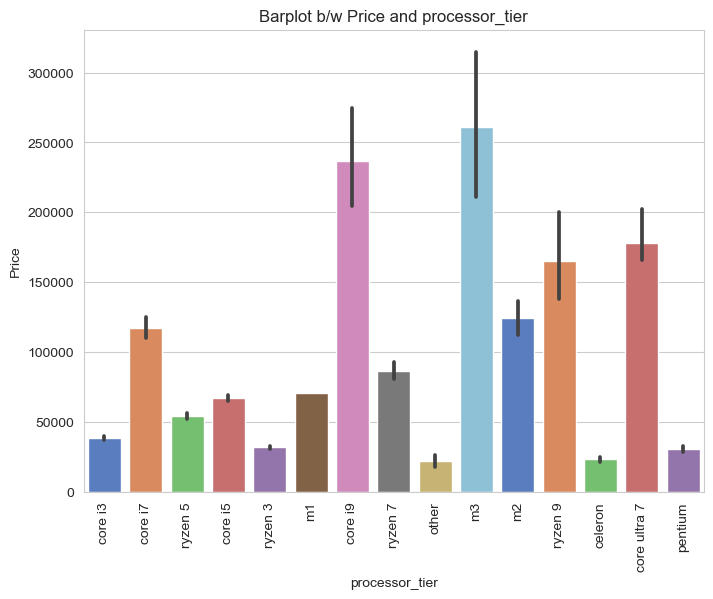

In [68]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='processor_tier', y='Price', palette="muted")
plt.title('Barplot b/w Price and processor_tier')
plt.xticks(rotation=90)
plt.show()

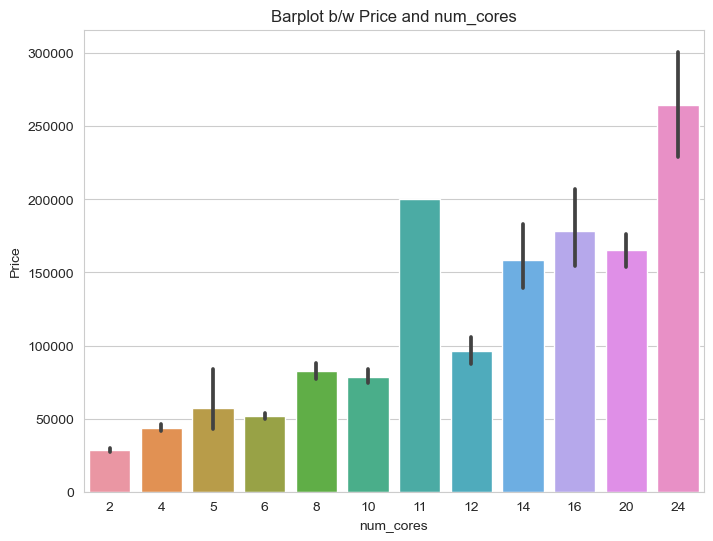

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='num_cores', y='Price')

plt.title('Barplot b/w Price and num_cores')
plt.show()

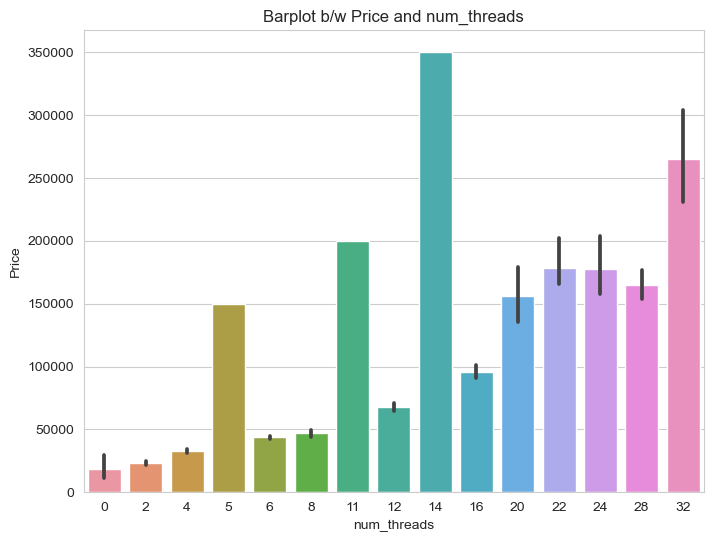

In [70]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='num_threads', y='Price')

plt.title('Barplot b/w Price and num_threads')
plt.show()

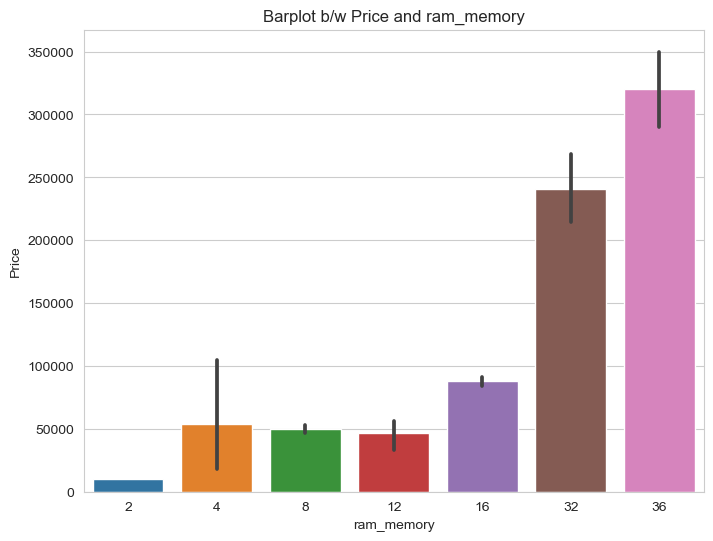

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='ram_memory', y='Price')

plt.title('Barplot b/w Price and ram_memory')
plt.show()

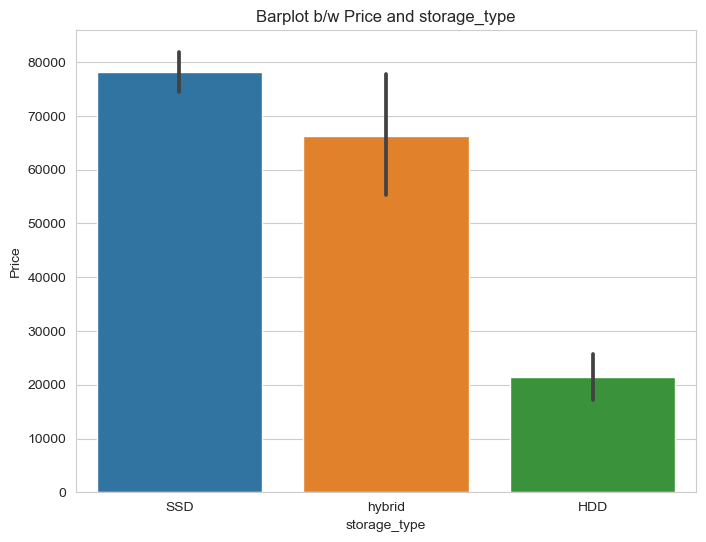

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='storage_type', y='Price')

plt.title('Barplot b/w Price and storage_type')
plt.show()

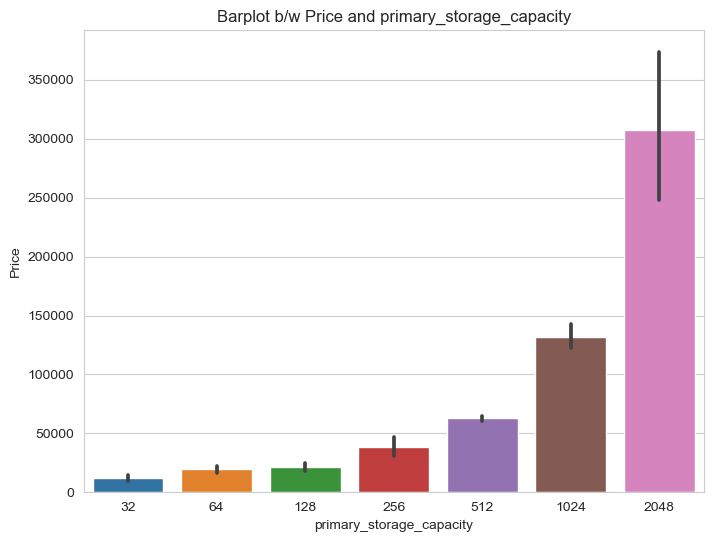

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='primary_storage_capacity', y='Price')

plt.title('Barplot b/w Price and primary_storage_capacity')
plt.show()

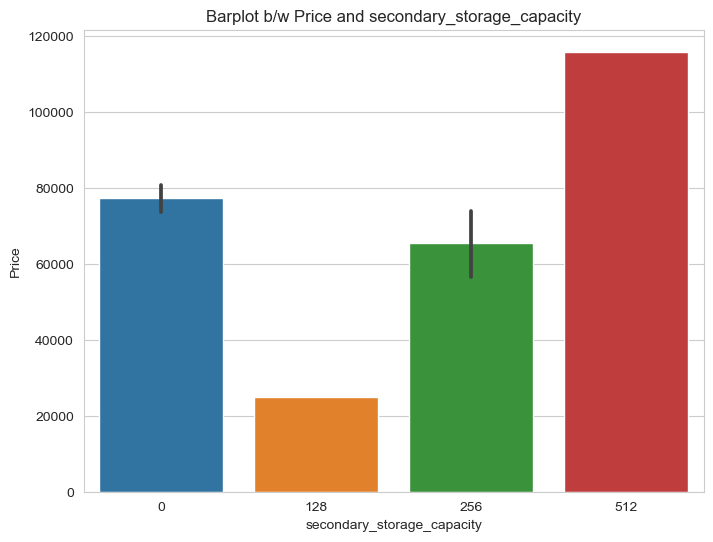

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='secondary_storage_capacity', y='Price')

plt.title('Barplot b/w Price and secondary_storage_capacity')
plt.show()

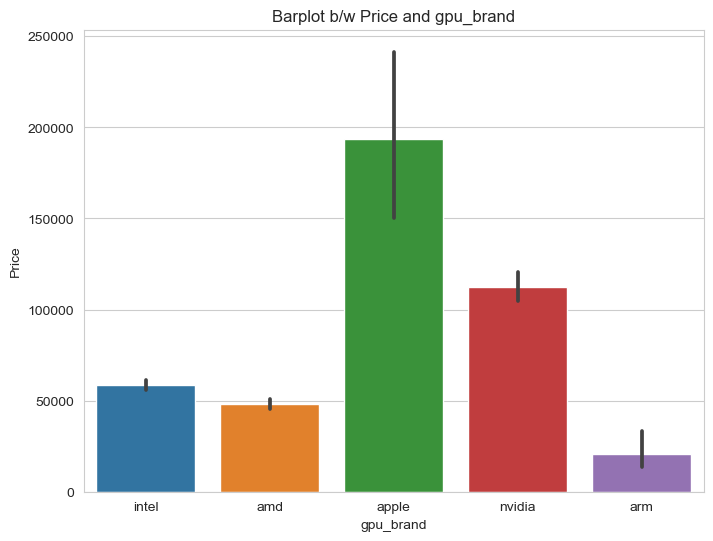

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='gpu_brand', y='Price')

plt.title('Barplot b/w Price and gpu_brand')
plt.show()

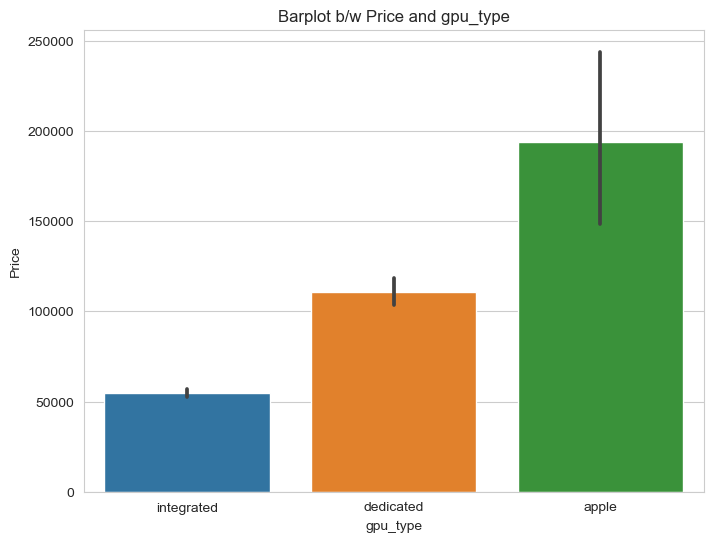

In [76]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='gpu_type', y='Price')

plt.title('Barplot b/w Price and gpu_type')
plt.show()


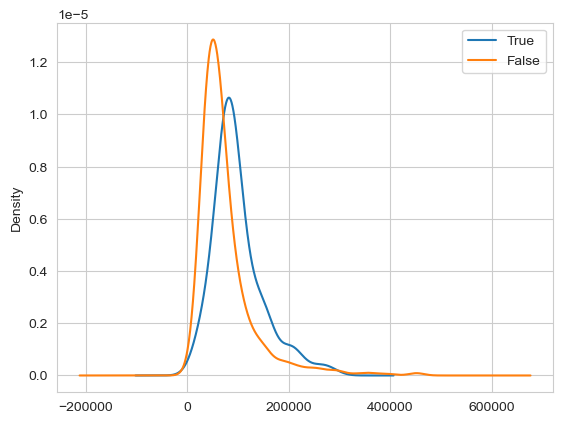

In [77]:
df[df['is_touch_screen'] == True]['Price'].plot(kind='kde', label='True')
df[df['is_touch_screen'] == False]['Price'].plot(kind='kde', label='False')

plt.legend()
plt.show()

<Axes: xlabel='ppi', ylabel='Price'>

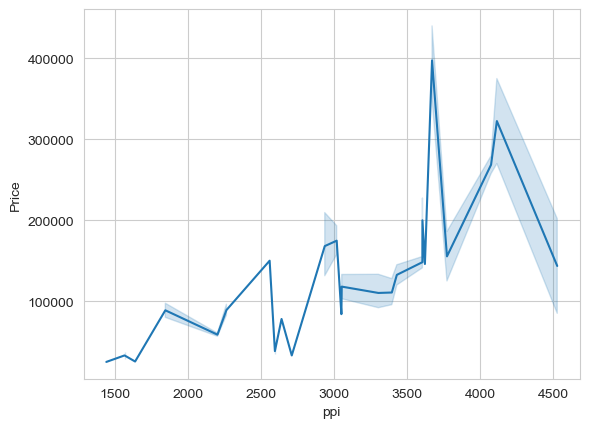

In [78]:
sns.lineplot(x="ppi", y="Price", data=df)

<Axes: xlabel='dpi', ylabel='Price'>

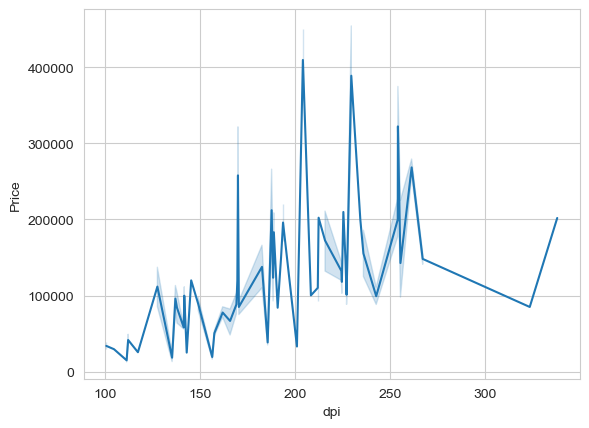

In [79]:
sns.lineplot(x="dpi", y="Price", data=df)


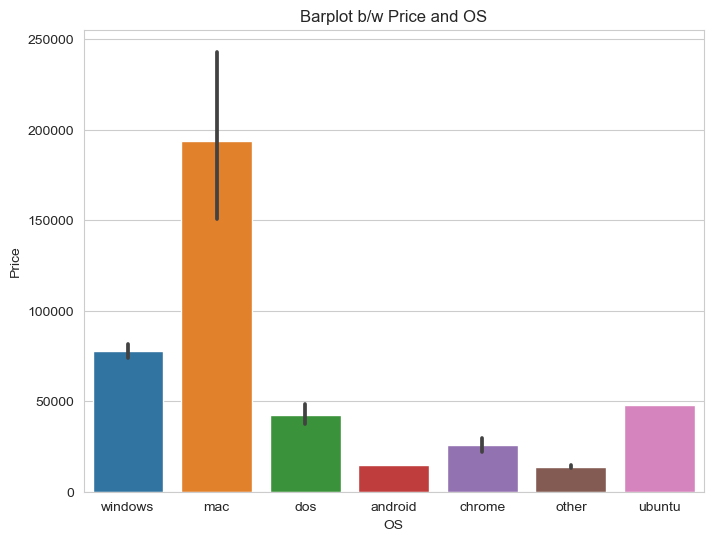

In [80]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='OS', y='Price')

plt.title('Barplot b/w Price and OS')
plt.show()

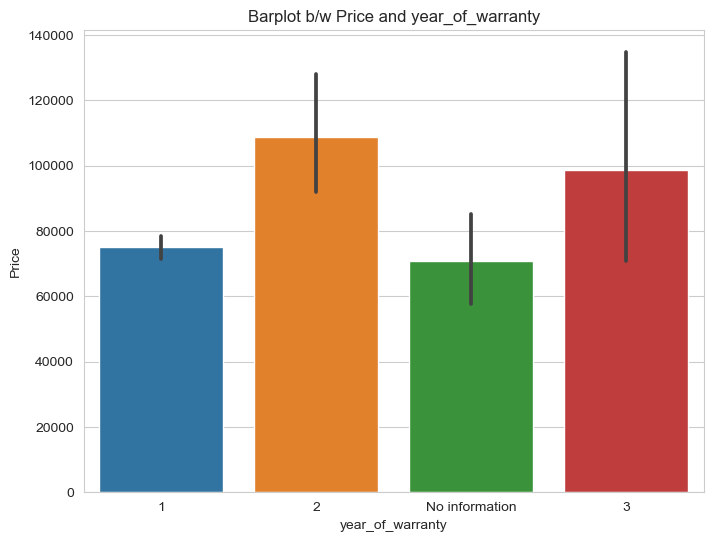

In [81]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='year_of_warranty', y='Price')

plt.title('Barplot b/w Price and year_of_warranty')
plt.show()

In [82]:
categorical = categorical.drop(columns = 'Model')


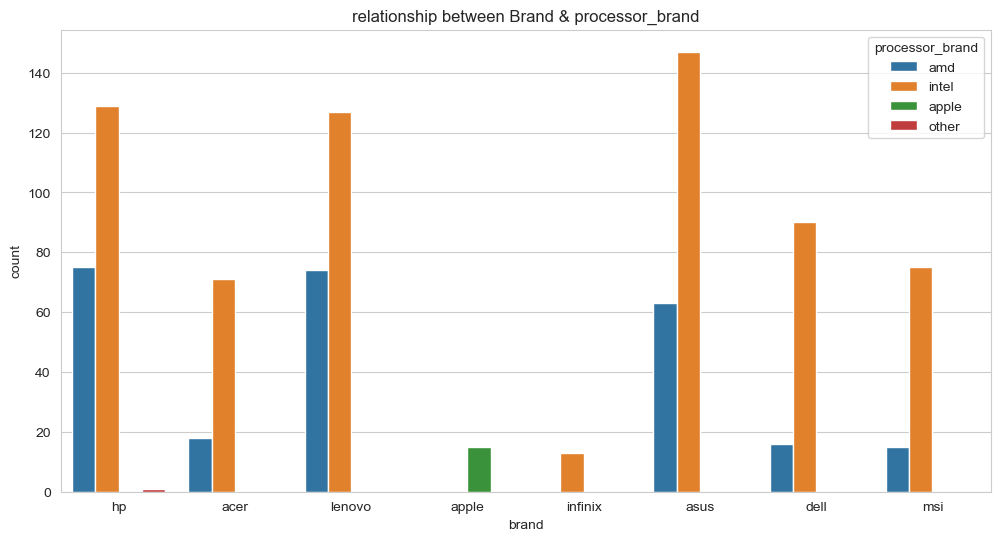

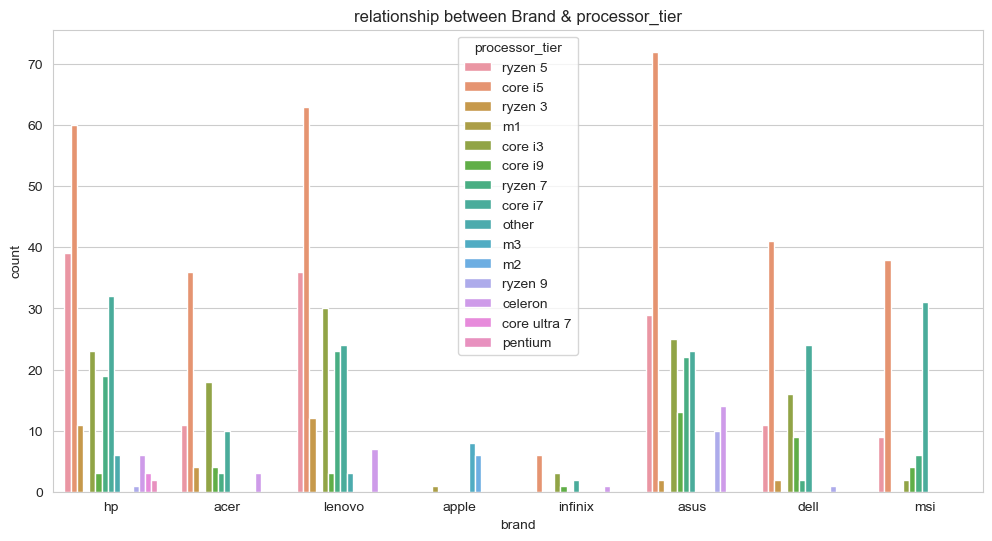

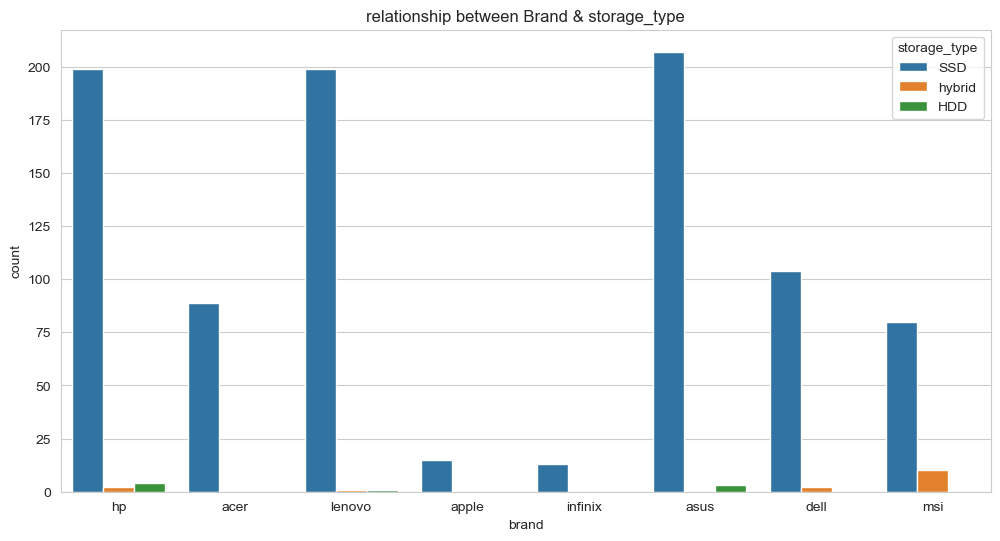

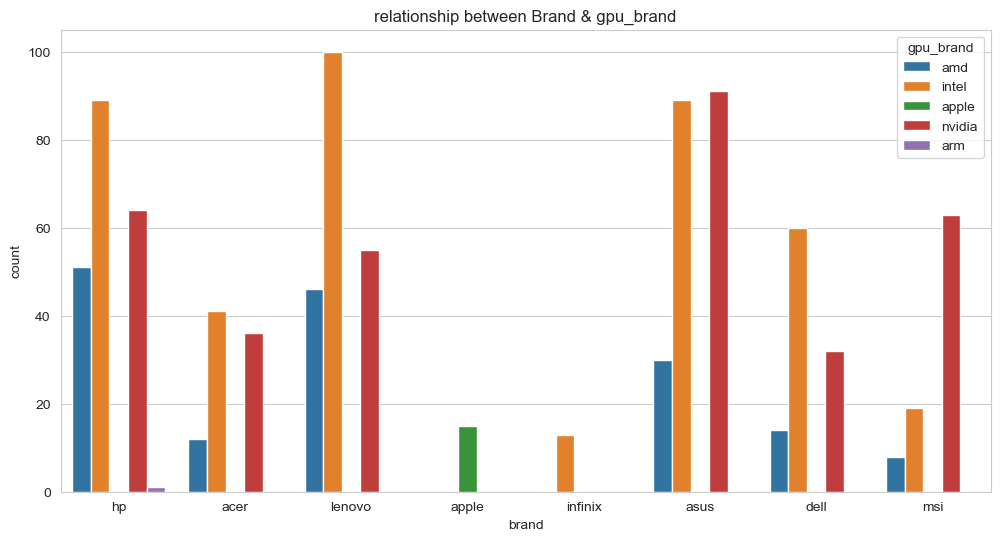

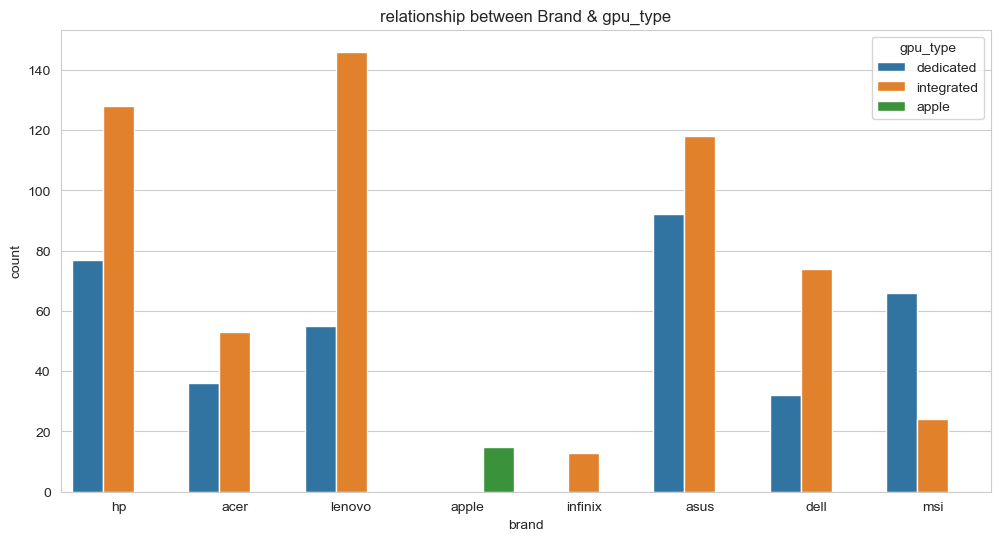

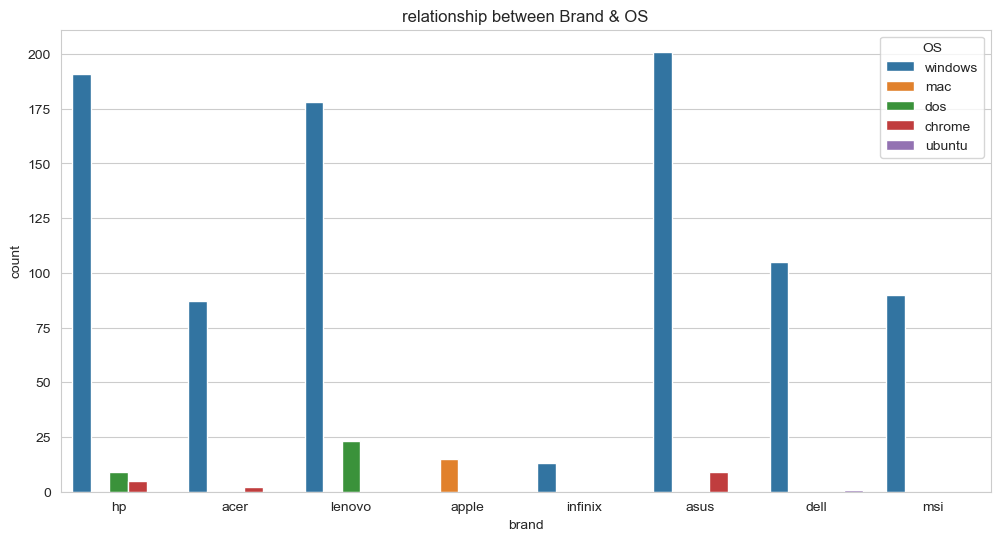

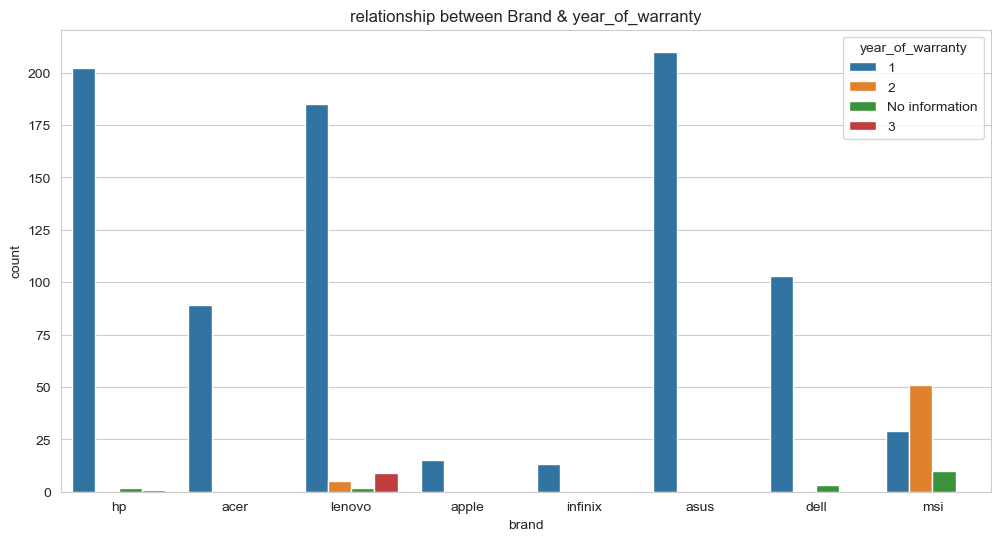

In [83]:
top_brands = df['brand'].value_counts().head(8).index

# Filter the DataFrame to include only the rows with the top 8 brands
df_top_brands = df[df['brand'].isin(top_brands)]

for i in categorical.columns:
    if i == 'brand':
        pass
    else:
        plt.figure(figsize=(12,6))
        sns.countplot(x='brand',hue=i,data=df_top_brands)
        plt.title(f'relationship between Brand & {i}')
        plt.show()

Multivariate analysis

conclusions:

There is a positive correlation b/w price and rating, num_cores, num_threads, ram_memory, primary_storage_capacity

<Axes: >

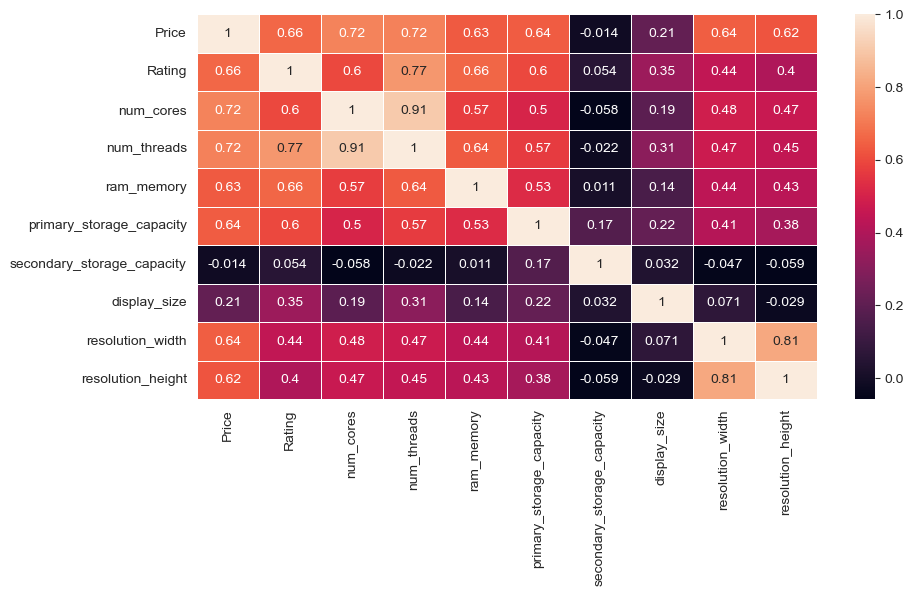

In [84]:
plt.figure(figsize=(10,5))
sns.heatmap(numerical.corr(), linewidths=.5, annot=True)


<Axes: >

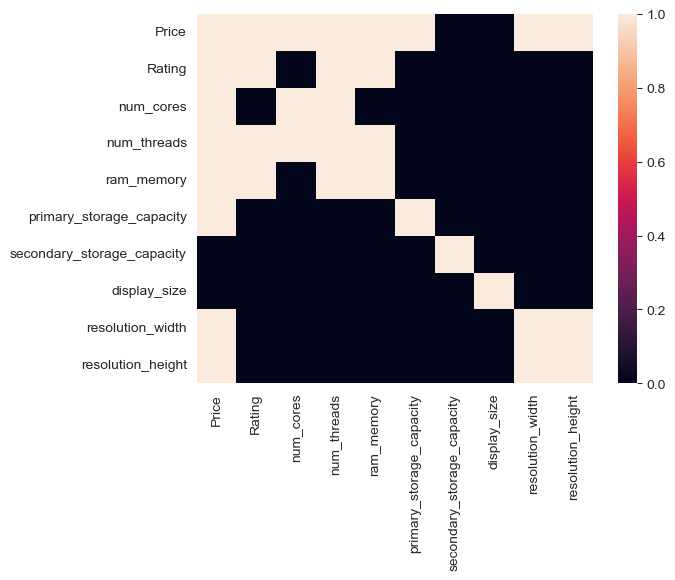

In [85]:
sns.heatmap(numerical.corr()>0.6 )

<Axes: >

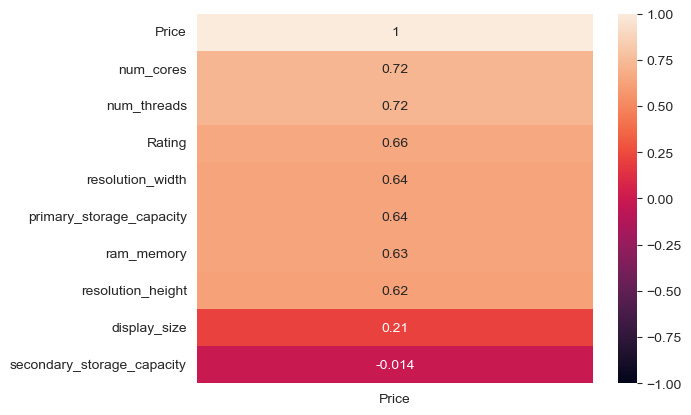

In [86]:
sns.heatmap(numerical.corr()[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True,)

C:\Users\gauri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


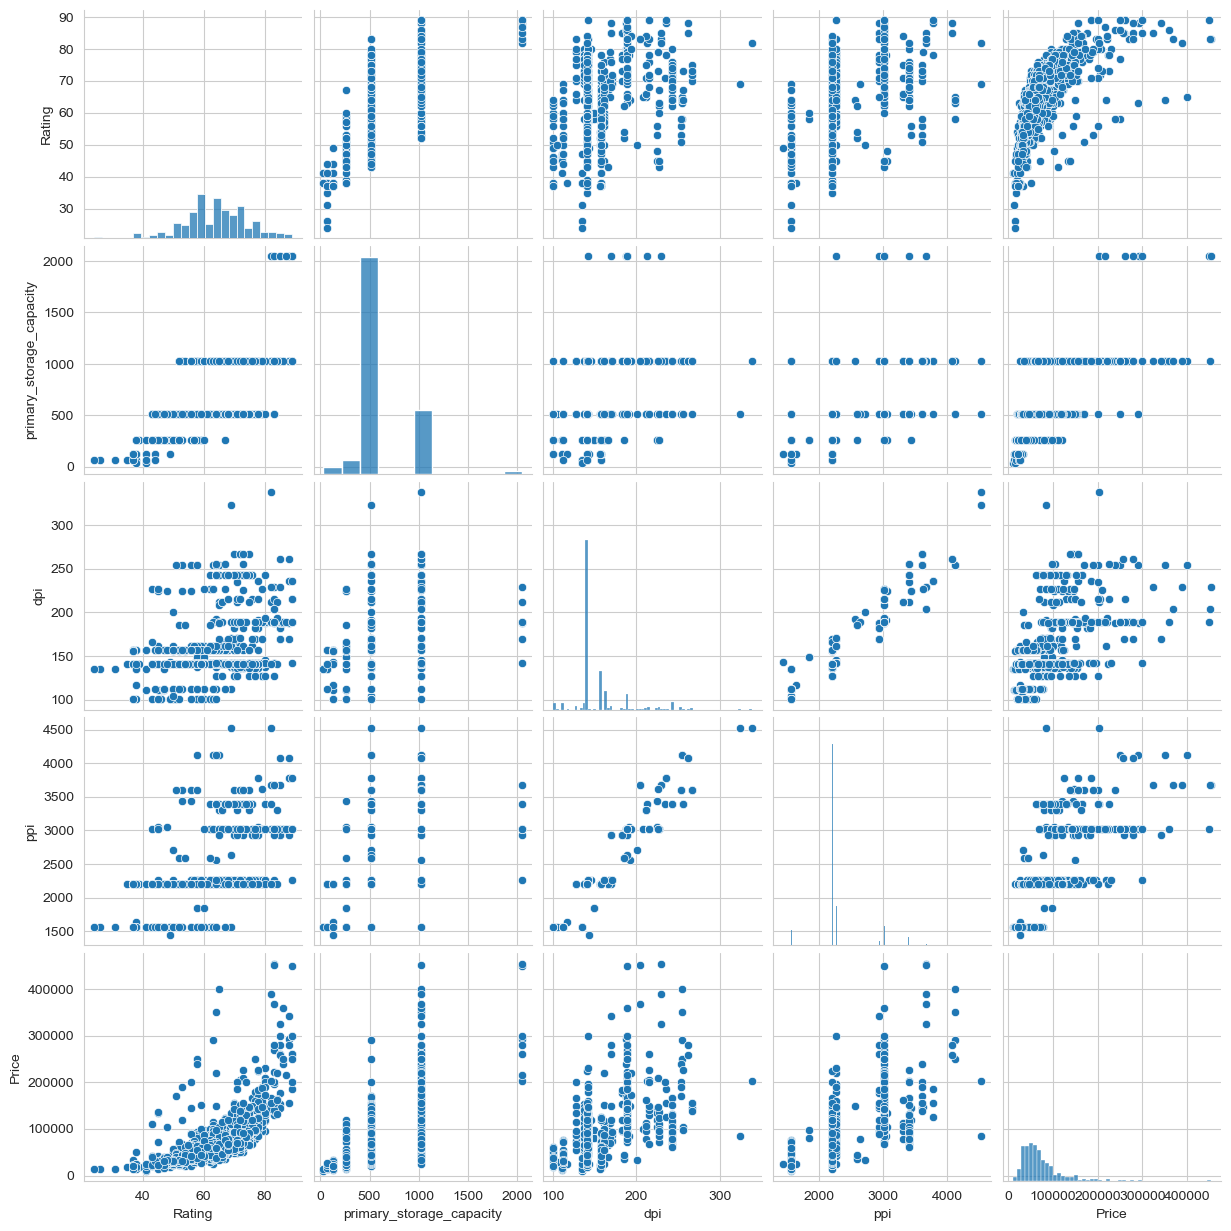

In [87]:
sns.pairplot(df[['Rating','primary_storage_capacity','dpi','ppi','Price']])

Set a variable X equal to the numerical features of the laptops and a variable y equal to the "Price" column.

In [88]:
x = df[['Rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity']]

In [89]:
y= df[['Price']]

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [91]:
lm = LinearRegression()

In [92]:
lm.fit( x_train, y_train)

LinearRegression()

In [93]:
lm.coef_

array([[ 1323.63424213,  8337.73546603, -2081.81308897,   883.50507142,
           53.03399833]])

In [94]:
predictions = lm.predict(x_test)

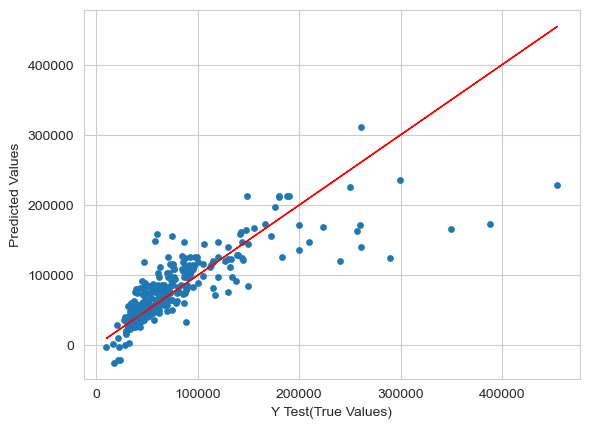

In [95]:
plt.scatter(y_test,predictions,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)

plt.show()

In [96]:
print("R^2 on training  data ",lm.score(x_train, y_train))
print("R^2 on testing data ",lm.score(x_test,y_test))

R^2 on training  data  0.6771184037548892
R^2 on testing data  0.6398244502354333


In [97]:
mlr_r2 = r2_score(y_test, predictions)

In [98]:
print("Multiple Linear Regression R2 Score:", mlr_r2)

Multiple Linear Regression R2 Score: 0.6398244502354333


In [99]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor object
model = DecisionTreeRegressor()

# Train the model
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [100]:
y_pred= model.predict(x_test)  

In [101]:
y_pred

array([139490.        ,  72189.66666667,  60793.33333333,  55230.66666667,
        63242.        ,  76481.5       ,  81723.33333333, 119990.        ,
       168500.        ,  43690.        ,  55540.        ,  74115.        ,
        74085.        ,  66059.66666667,  87694.75      ,  99480.        ,
        77490.        ,  64435.        ,  35626.33333333, 113990.        ,
        38990.        ,  30499.5       ,  56490.        ,  48990.        ,
        79990.        ,  64435.        ,  87990.        ,  47990.        ,
        42990.        , 140240.        ,  74600.2       ,  77323.33333333,
        69868.28571429,  35126.66666667, 109990.        ,  42990.        ,
        30865.        , 159990.        , 108950.5       , 152990.        ,
       149290.        ,  52990.        ,  53240.        ,  68354.        ,
        32163.        ,  30865.        ,  57990.        ,  50785.        ,
        54990.        ,  51990.        , 109190.        ,  47244.5       ,
        28190.        ,  

In [102]:
r2_model = r2_score(y_test,y_pred)
print("R-squared score for Decision Tree :", r2_model)

R-squared score for Decision Tree : 0.6907129606155751


In [103]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor object
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the testing set
rf_predictions = rf_model.predict(x_test)

# Calculate R-squared score
r2_rf = r2_score(y_test,rf_predictions)
print("R-squared score for Random Forest:", r2_rf)

C:\Users\gauri\AppData\Local\Temp\ipykernel_1604\2900899535.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


R-squared score for Random Forest: 0.7334530844884932


In [104]:
from sklearn.ensemble import GradientBoostingRegressor
# Applying Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

# Calculating R2 score and MAE for Gradient Boosting Regression
gb_r2 = r2_score(y_test, gb_pred)

# Printing R2 score and MAE for Gradient Boosting Regression
print("Gradient Boosting Regression R2 Score:", gb_r2)


Gradient Boosting Regression R2 Score: 0.7536836649247949


C:\Users\gauri\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
